In [1]:
import numpy as np
import time
import math

In [2]:
import os
print(os.cpu_count())

12


In [3]:

# Problems
#import src.problems.more_trig as problem
import src.problems.more_eps as problem
#import src.problems.cuter as problem
#import src.problems.denoise_image as problem
#import src.problems.lr_gen_cancer as problem
#import src.problems.easy as problem

# Config and method
from src.config import armijo, v_gauss_sw_init, use_parallel
from src.cgd import choice_coordinates, calculate_H, calulate_direction, calculate_alpha, count_nonzeros, step
from src.metrics import init_metrics, generate_metrics


In [4]:

# Get x0
x = problem.x_init()

# Init config
alfa = armijo['alfa_init']
v_gauss_southwell = v_gauss_sw_init

# Init metrics
hist, ts_metrics = init_metrics()

# Loop
k = 0
while True:
    #if k >= 10:
    #    break

    # One step of the method
    x, alfa, v_gauss_southwell, stop_loop, step_metrics = step(k, x, problem, armijo, alfa, v_gauss_southwell, use_parallel, ts_metrics)
    k = k+1

    # Show metrics.
    hist.append(step_metrics)

    if stop_loop:
        break



Iteration 0
f value:, 57500.00
f grad:, 13497.00
Lenght J: 750 / 1000
NZ: 500 / 1000

Iteration 1
f value:, 14326.85
f grad:, 3814.88
Lenght J: 500 / 1000
NZ: 500 / 1000

Iteration 2
f value:, 12961.79
f grad:, 3782.87
Lenght J: 500 / 1000
NZ: 500 / 1000

Iteration 3
f value:, 10575.68
f grad:, 3176.99
Lenght J: 500 / 1000
NZ: 500 / 1000

Iteration 4
f value:, 8843.66
f grad:, 2839.85
Lenght J: 500 / 1000
NZ: 500 / 1000

Iteration 5
f value:, 6872.10
f grad:, 2333.59
Lenght J: 500 / 1000
NZ: 250 / 1000

Iteration 6
f value:, 5044.75
f grad:, 1826.38
Lenght J: 250 / 1000
NZ: 250 / 1000

Iteration 7
f value:, 1820.72
f grad:, 459.65
Lenght J: 250 / 1000
NZ: 0 / 1000

Iteration 8
f value:, 1250.00
f grad:, 223.61
Lenght J: 1000 / 1000
NZ: 0 / 1000


Total seconds: 4.623


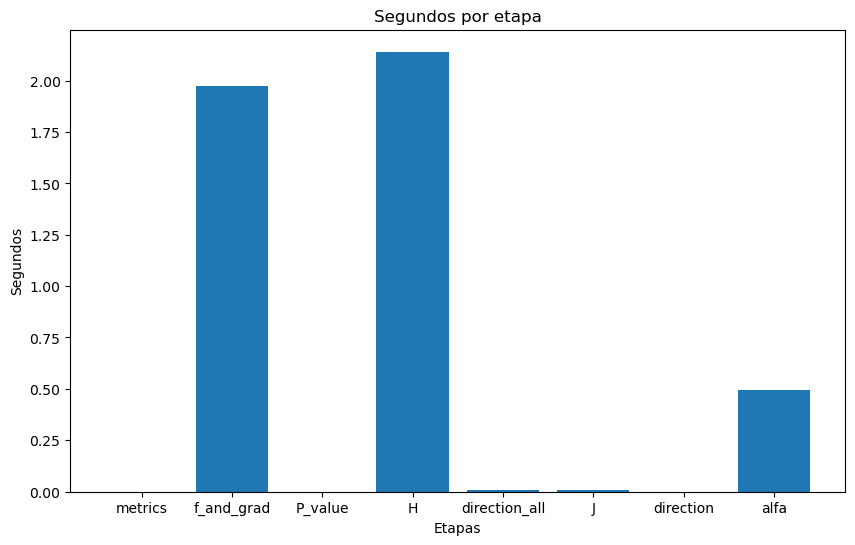

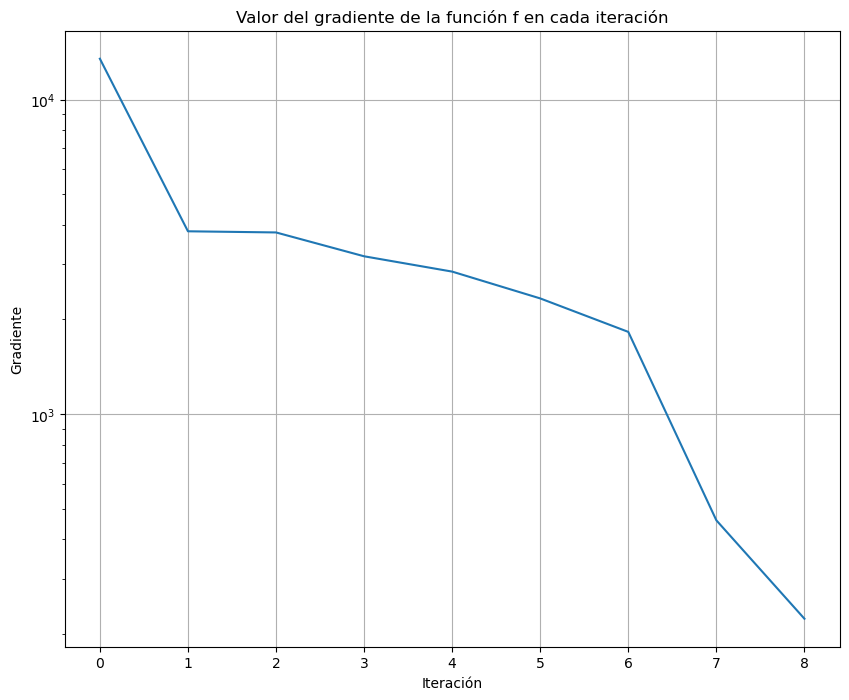

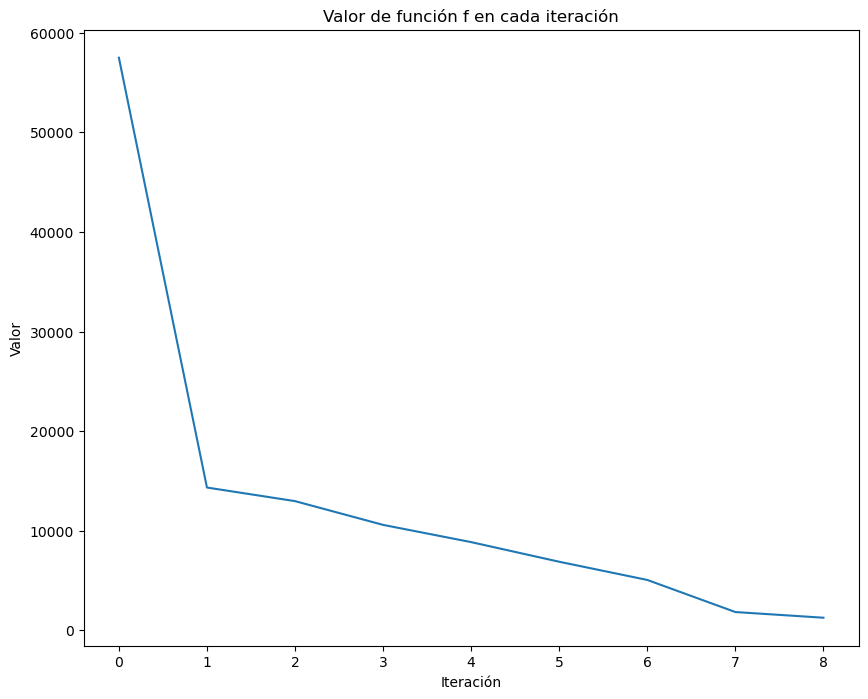

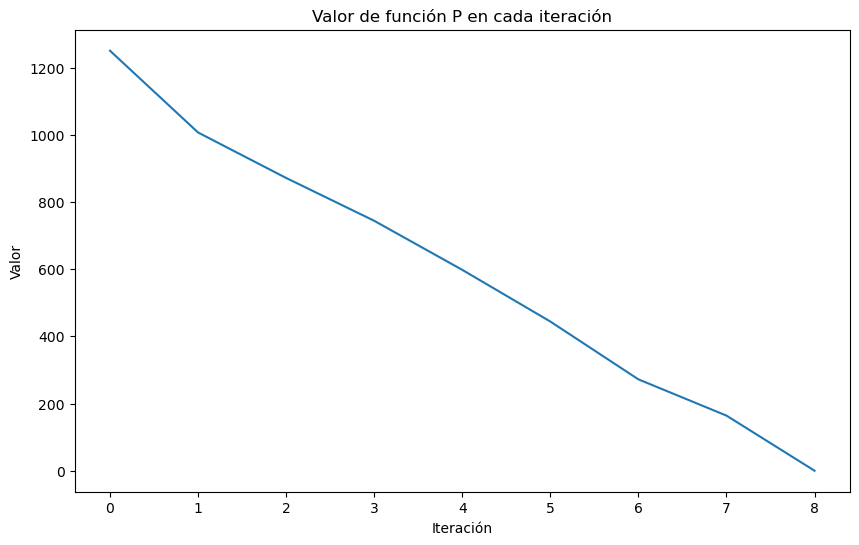

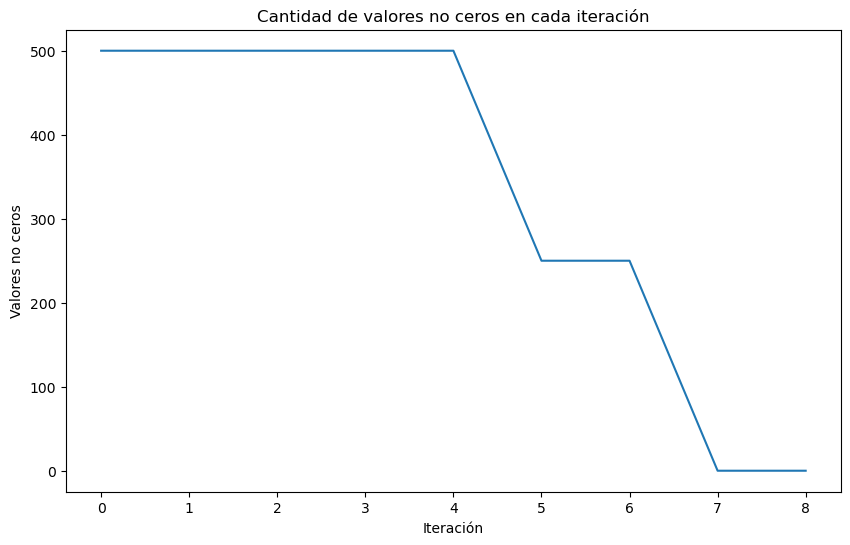

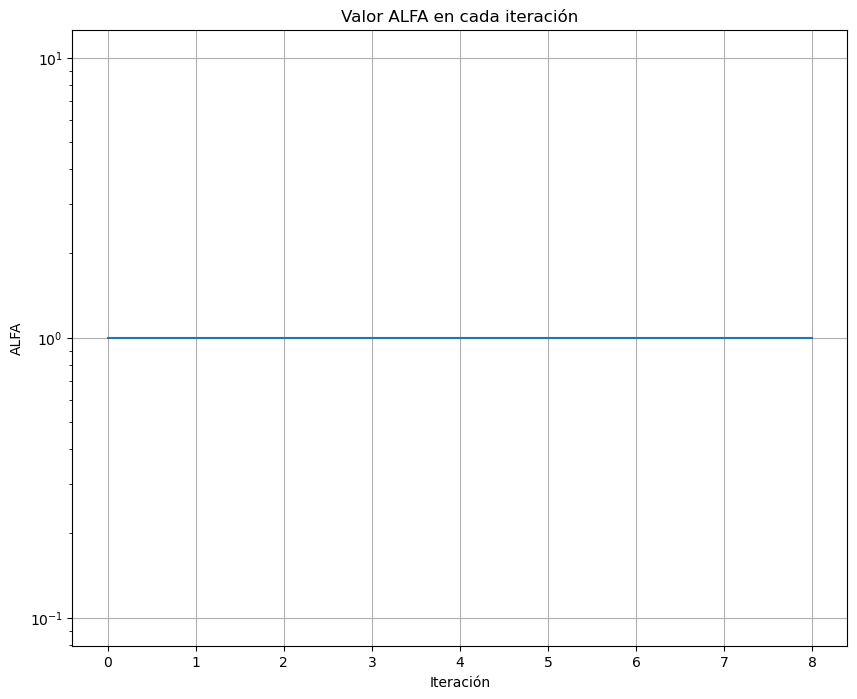

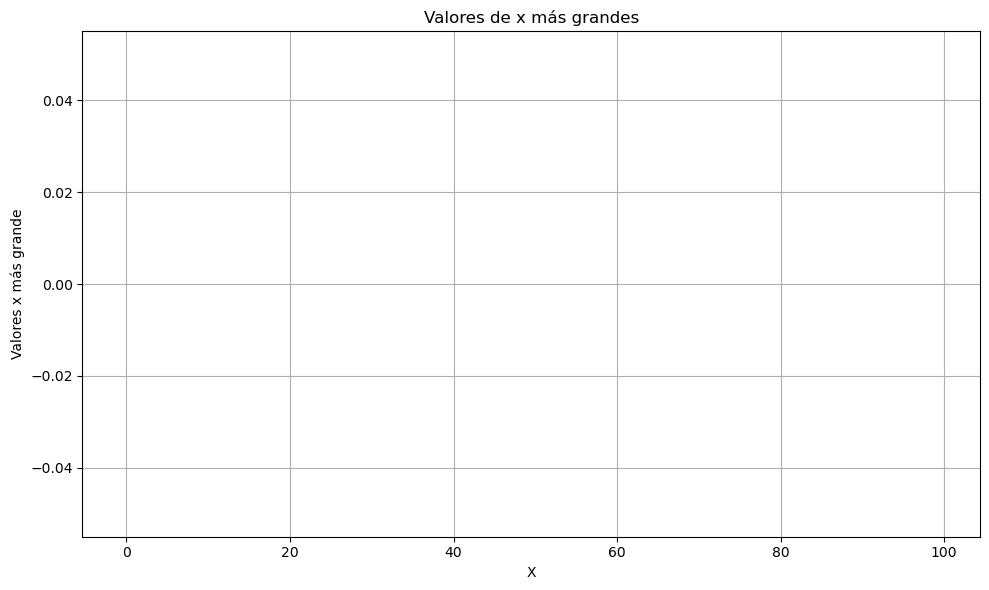

In [5]:
generate_metrics(f"./metrics/{problem.name}", x, hist, ts_metrics)